In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
df_hours = pd.read_csv("https://raw.githubusercontent.com/artamonoff/econometrica/main/econometrica-1/datasets/wage2.csv")
df_hours

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,520,40,79,28,16,6,1,30,1,1,1,0,0,1.0,11.0,NaN,6.253829
931,1202,40,102,32,13,10,3,31,1,0,1,1,7,7.0,8.0,6.0,7.091742
932,538,45,77,22,12,12,10,28,1,1,1,0,9,NaN,7.0,NaN,6.287858
933,873,44,109,25,12,12,12,28,1,0,1,0,1,1.0,NaN,11.0,6.771935


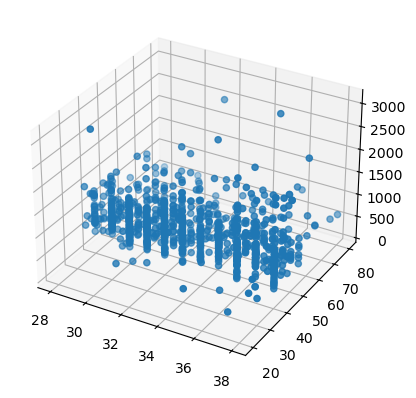

In [3]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter (xs = 'age', ys = 'hours',zs = 'wage', data = df_hours)
plt.show()

In [4]:
#Подгоним плоскость 
fitted_plane = smf.ols(formula= 'hours ~ age + np.sin(wage)', data=df_hours).fit()

In [5]:
fitted_plane.params

Intercept       41.835248
age              0.063735
np.sin(wage)    -0.333183
dtype: float64

In [6]:
beta0, beta1, beta2 = fitted_plane.params

In [7]:
X= np.arange(start = df_hours ['age'].min(), stop = df_hours['age'].max(), step=1)
Y= np.arange(start = df_hours ['wage'].min(), stop = df_hours ['wage'].max(), step=1)
X,Y = np.meshgrid(X,Y)

In [8]:
Z = beta0 + beta1 * X+ beta2 * Y

<function matplotlib.pyplot.show(close=None, block=None)>

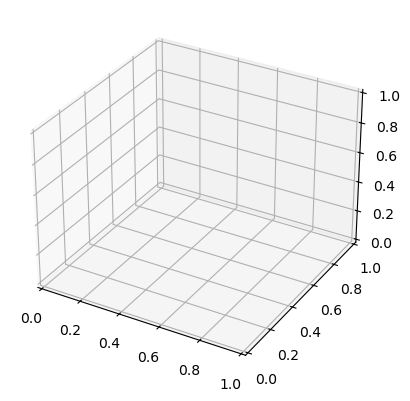

In [9]:
fig.ax = plt.subplots(subplot_kw = {'projection': '3d'})
ax.plot_surface(X,Y,Z, color = 'r', alpha = 0.2)
ax.scatter (zs = 'wage', xs = 'age', ys = 'hours', data = df_hours)
plt.show